##**Import Packages**

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.config.run_functions_eagerly(True)
import numpy as np
import pandas as pd
import sklearn
import pickle
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##**Import Data & Labelling**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import dataset_capstone.csv
data = pd.read_csv("/content/drive/MyDrive/Capstone/dataset_capstone.csv")

In [ ]:
data

,Makanan,Karbohidrat,Protein,Sayur,Pengolahan
0,Sosis Bakar,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar
1,Ngohiong Ayam Udang,Tidak ada,Lainnya,Tidak,Goreng atau tumis
2,Rawon Ayam,Tidak ada,Ayam dan daging,Ya,Rebus atau kukus
3,Usus Goreng Crispy,Tidak ada,Ayam dan daging,Tidak,Goreng atau tumis
4,Ceker Rica Rica,Tidak ada,Ayam dan daging,Tidak,Goreng atau tumis
...,...,...,...,...,...
1223,Lotek,"Tepung, Mie, dan Pasta",Tidak ada,Ya,Lainnya
1224,Guacamole,Tidak ada,Tidak ada,Tidak,Lainnya
1225,Asinan Rambutan,Tidak ada,Tidak ada,Tidak,Lainnya
1226,Asinan Buah,Tidak ada,Tidak ada,Tidak,Lainnya


In [ ]:
data.shape

(1228, 5)

In [ ]:
data.isna().sum()

Makanan        0
Karbohidrat    0
Protein        0
Sayur          0
Pengolahan     0
dtype: int64

In [ ]:
#data = data.dropna()

In [ ]:
data

,Makanan,Karbohidrat,Protein,Sayur,Pengolahan
0,Sosis Bakar,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar
1,Ngohiong Ayam Udang,Tidak ada,Lainnya,Tidak,Goreng atau tumis
2,Rawon Ayam,Tidak ada,Ayam dan daging,Ya,Rebus atau kukus
3,Usus Goreng Crispy,Tidak ada,Ayam dan daging,Tidak,Goreng atau tumis
4,Ceker Rica Rica,Tidak ada,Ayam dan daging,Tidak,Goreng atau tumis
...,...,...,...,...,...
1223,Lotek,"Tepung, Mie, dan Pasta",Tidak ada,Ya,Lainnya
1224,Guacamole,Tidak ada,Tidak ada,Tidak,Lainnya
1225,Asinan Rambutan,Tidak ada,Tidak ada,Tidak,Lainnya
1226,Asinan Buah,Tidak ada,Tidak ada,Tidak,Lainnya


In [ ]:
list = pd.read_csv('/content/drive/MyDrive/Capstone/class.csv')

In [ ]:
#inner join based on the same column
data = pd.merge(data, list, on=['Karbohidrat', 'Protein', 'Sayur', 'Pengolahan'], how='inner')

#merge class values according to the first dataset
data['Kelas'] = data['Kelas_x']

#display only the columns 'Karbohidrat', 'Protein', 'Sayur', 'Pengolahan', dan 'Kelas'
data = data[['Makanan','Karbohidrat', 'Protein', 'Sayur', 'Pengolahan', 'Kelas']]

#display the merge result with the merged class values
print(data)

                     Makanan             Karbohidrat          Protein  Sayur  \
0                Sosis Bakar               Tidak ada  Ayam dan daging  Tidak   
1              Yakitori Ayam               Tidak ada  Ayam dan daging  Tidak   
2     Ayam Bakar Bumbu Rujak               Tidak ada  Ayam dan daging  Tidak   
3          Ayam Bakar Klaten               Tidak ada  Ayam dan daging  Tidak   
4           Ayam Goreng Cabe               Tidak ada  Ayam dan daging  Tidak   
...                      ...                     ...              ...    ...   
1223           Singkong Keju                 Lainnya          Lainnya  Tidak   
1224   Puding Ombre Ubi Ungu                 Lainnya          Lainnya  Tidak   
1225          Manisan Mangga               Tidak ada        Tidak ada  Tidak   
1226                 Sarabba               Tidak ada        Tidak ada  Tidak   
1227                   Lotek  Tepung, Mie, dan Pasta        Tidak ada     Ya   

               Pengolahan  Kelas  
0   

In [ ]:
#data.to_csv('/content/drive/MyDrive/Capstone/dataset.csv')

In [ ]:
data

,Makanan,Karbohidrat,Protein,Sayur,Pengolahan,Kelas
0,Sosis Bakar,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,10
1,Yakitori Ayam,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,10
2,Ayam Bakar Bumbu Rujak,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,10
3,Ayam Bakar Klaten,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,10
4,Ayam Goreng Cabe,Tidak ada,Ayam dan daging,Tidak,Panggang atau bakar,10
...,...,...,...,...,...,...
1223,Singkong Keju,Lainnya,Lainnya,Tidak,Goreng atau tumis,153
1224,Puding Ombre Ubi Ungu,Lainnya,Lainnya,Tidak,Rebus atau kukus,155
1225,Manisan Mangga,Tidak ada,Tidak ada,Tidak,Rebus atau kukus,3
1226,Sarabba,Tidak ada,Tidak ada,Tidak,Rebus atau kukus,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
label_encoder = LabelEncoder()

#perform label encoding on 'team' column
data['Karbohidrat'] = label_encoder.fit_transform(data['Karbohidrat'])
data['Protein'] = label_encoder.fit_transform(data['Protein'])
data['Sayur'] = label_encoder.fit_transform(data['Sayur'])
data['Pengolahan'] = label_encoder.fit_transform(data['Pengolahan'])

In [ ]:
data

,Makanan,Karbohidrat,Protein,Sayur,Pengolahan,Kelas
0,Sosis Bakar,3,0,0,2,10
1,Yakitori Ayam,3,0,0,2,10
2,Ayam Bakar Bumbu Rujak,3,0,0,2,10
3,Ayam Bakar Klaten,3,0,0,2,10
4,Ayam Goreng Cabe,3,0,0,2,10
...,...,...,...,...,...,...
1223,Singkong Keju,1,2,0,0,153
1224,Puding Ombre Ubi Ungu,1,2,0,3,155
1225,Manisan Mangga,3,4,0,3,3
1226,Sarabba,3,4,0,3,3


*Karbohidrat* 


*  0 = Beras dan olahannya
*  1 = Lainnya
*  2 = Tepung, Mie, dan Pasta
*  3 = Tidak ada


*Protein* 


*  0 = Ayam dan daging
*  1 = Ikan dan Seafood
*  2 = Lainnya
*  3 = Tahu, tempe, dan telur
*  4 = Tidak ada

*Sayur* 


*  0 = Tidak
*  1 = Ya

*Pengolahan* 


*  0 = Goreng atau tumis
*  1 = Lainnya
*  2 = Panggang atau bakar
*  3 = Rebus atau kukus

##**Label and Split Data**

In [ ]:
df = data[["Karbohidrat",  "Protein", "Sayur", "Pengolahan","Kelas"]]

In [ ]:
#use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(df, test_size=0.2)

In [ ]:
train_df

,Karbohidrat,Protein,Sayur,Pengolahan,Kelas
116,3,0,0,0,9
1092,2,3,0,2,106
201,2,0,0,3,91
235,3,2,0,3,35
610,2,3,1,0,109
...,...,...,...,...,...
179,3,0,0,3,11
445,3,1,0,3,19
215,2,0,0,0,89
61,3,0,0,0,9


In [ ]:
test_df

,Karbohidrat,Protein,Sayur,Pengolahan,Kelas
1008,1,2,0,1,152
805,2,4,0,0,81
1109,2,3,0,2,106
214,2,0,0,0,89
366,3,1,0,2,18
...,...,...,...,...,...
552,3,1,1,3,23
1017,2,3,0,2,106
165,3,0,0,3,11
944,0,2,0,3,75


In [ ]:
val_df

,Karbohidrat,Protein,Sayur,Pengolahan,Kelas
821,2,4,0,0,81
537,3,1,1,0,21
477,3,1,0,0,17
68,3,0,0,0,9
170,3,0,0,3,11
...,...,...,...,...,...
1200,0,3,0,3,67
538,3,1,1,0,21
554,3,1,1,3,23
672,2,3,0,3,107


In [ ]:
#form np arrays of labels and features.
train_labels = np.array(train_df.pop('Kelas'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Kelas'))
test_labels = np.array(test_df.pop('Kelas'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (982,)
Validation labels shape: (246,)
Test labels shape: (246,)
Training features shape: (982, 4)
Validation features shape: (246, 4)
Test features shape: (246, 4)


In [ ]:
#scaler = StandardScaler()
#train_features = scaler.fit_transform(train_features)

#val_features = scaler.transform(val_features)
#test_features = scaler.transform(test_features)

#train_features = np.clip(train_features, -160, 160)
#val_features = np.clip(val_features, -160, 160)
#test_features = np.clip(test_features, -160, 160)


#print('Training labels shape:', train_labels.shape)
#print('Validation labels shape:', val_labels.shape)
#print('Test labels shape:', test_labels.shape)

#print('Training features shape:', train_features.shape)
#print('Validation features shape:', val_features.shape)
#print('Test features shape:', test_features.shape)

In [ ]:
train_features

array([[3, 0, 0, 0],
       [2, 3, 0, 2],
       [2, 0, 0, 3],
       ...,
       [2, 0, 0, 0],
       [3, 0, 0, 0],
       [2, 3, 0, 3]])

In [ ]:
test_features

array([[1, 2, 0, 1],
       [2, 4, 0, 0],
       [2, 3, 0, 2],
       [2, 0, 0, 0],
       [3, 1, 0, 2],
       [2, 1, 0, 0],
       [3, 4, 0, 1],
       [3, 1, 1, 3],
       [1, 4, 0, 3],
       [3, 1, 0, 3],
       [1, 4, 0, 3],
       [2, 4, 0, 0],
       [2, 3, 0, 2],
       [2, 2, 0, 3],
       [3, 1, 0, 3],
       [0, 0, 1, 3],
       [2, 3, 0, 2],
       [2, 0, 1, 3],
       [2, 0, 1, 3],
       [3, 3, 0, 0],
       [2, 3, 0, 2],
       [3, 1, 0, 3],
       [2, 3, 0, 2],
       [0, 2, 0, 0],
       [2, 3, 0, 1],
       [3, 1, 0, 3],
       [3, 2, 0, 3],
       [2, 3, 0, 1],
       [3, 1, 0, 3],
       [3, 2, 0, 1],
       [3, 4, 1, 3],
       [3, 0, 0, 3],
       [0, 2, 0, 0],
       [2, 0, 0, 1],
       [2, 4, 0, 2],
       [3, 4, 0, 1],
       [2, 3, 0, 2],
       [2, 2, 0, 0],
       [2, 4, 0, 3],
       [2, 2, 0, 0],
       [2, 4, 1, 0],
       [2, 3, 0, 2],
       [3, 0, 0, 3],
       [2, 0, 1, 1],
       [0, 2, 1, 1],
       [3, 1, 0, 0],
       [3, 0, 0, 3],
       [2, 0,

In [ ]:
val_features

array([[2, 4, 0, 0],
       [3, 1, 1, 0],
       [3, 1, 0, 0],
       [3, 0, 0, 0],
       [3, 0, 0, 3],
       [2, 3, 0, 3],
       [3, 0, 1, 0],
       [1, 0, 0, 3],
       [0, 0, 0, 2],
       [0, 2, 0, 0],
       [3, 0, 1, 3],
       [2, 3, 0, 0],
       [2, 1, 0, 3],
       [3, 1, 0, 3],
       [3, 0, 0, 0],
       [3, 0, 1, 3],
       [3, 3, 0, 1],
       [1, 4, 0, 3],
       [3, 3, 1, 1],
       [3, 0, 0, 3],
       [2, 4, 0, 3],
       [3, 4, 1, 0],
       [3, 4, 1, 3],
       [3, 3, 0, 2],
       [3, 1, 0, 3],
       [3, 0, 0, 0],
       [2, 0, 0, 1],
       [3, 1, 0, 3],
       [3, 4, 1, 0],
       [2, 3, 0, 2],
       [2, 3, 0, 2],
       [3, 4, 1, 3],
       [2, 3, 0, 2],
       [2, 3, 0, 0],
       [2, 0, 0, 1],
       [2, 4, 0, 3],
       [2, 2, 0, 0],
       [2, 2, 0, 3],
       [3, 1, 0, 0],
       [3, 1, 0, 0],
       [2, 2, 0, 3],
       [2, 4, 0, 0],
       [3, 1, 0, 3],
       [3, 1, 0, 0],
       [1, 3, 0, 0],
       [2, 3, 0, 1],
       [3, 1, 0, 3],
       [2, 0,

In [ ]:
train_labels

array([  9, 106,  91,  35, 109, 121,  17,  99,  48,  83,  39, 105, 105,
         9,  35,  91,  85, 107,  19,  13,  11,  85,  65, 104,  81,  10,
        40,  48,  57,  88,  35, 105,  52,  27,  17,   5,  23, 106,  34,
       146,  19,  23,   9,  14, 113,  11,  10,  83,  80,  15,  18, 106,
        97, 106, 106,  19, 144,   9,  91,  43,   7, 106,  95, 106,  83,
        19,  49,   9,  97,  11,  92,  32,  76,  95,  16,  50,  27,   8,
       135,  43,  19,  85,  17,  35,   9, 123,  73,  48,  97,   4,  11,
         9,   9,  23,  43,  25,  64, 107,  19,  18, 105, 147,  35,  23,
         0, 106,  18, 123,  33, 106, 106,  27,  56,  77, 106,   8, 106,
        17, 103, 100,  27,  48,  19, 106,  35,  89,  82,   9,  95, 106,
       106, 123,  17,  88,   9,  24, 151, 135,  35, 114, 135,  91,  97,
        91, 106,   7,   0, 129,   5,  10,  21,  32,  92,  71, 106,  16,
       106, 106,  76,  25,  17,  19,  82,  11,  76,  11,  11,  95,   4,
        97, 155,  11,  82,  73, 107,  28,  89,  76,   5, 106, 11

In [ ]:
val_labels

array([ 81,  21,  17,   9,  11, 107,  13, 131,  50,  73,  15, 105,  99,
        19,   9,  15,  24, 123,  28,  11,  83,   5,   7,  26,  19,   9,
        88,  19,   5, 106, 106,   7, 106, 105,  88,  83, 113, 115,  17,
        17, 115,  81,  19,  17, 145, 104,  19,  88,  75,  15,  95,   4,
        17, 115,  95,  32,  19,  65, 105,  62,  81, 153,  16,  19,  15,
         0,   5, 105,  19,  83,   9,  10,  85, 106,  16,  18,  97,  35,
        68,  19, 106,  89,  93, 106, 107,  75,   4, 106, 121, 104, 106,
        72, 106,  19, 119,  67,  83, 113,  82, 106,  85,  93,  11, 123,
       136,  19, 144,  24,   0,  95,  25, 146,   9,  39,  73, 113, 117,
       113,  25,   5,  48,  11,  11, 106,  35, 104,  82,  27,  89,  75,
        10,  55,  19,  58,  88,  82, 105,  19, 106,  13, 110,  35, 115,
        68, 112,  92, 104,  21,   4, 123,  19,  11,  99, 106,  11, 147,
        99,  91, 106,   0,  10,  18,  27,   9,  27,  32,   5,  11,   9,
        79,  73, 104, 121,  15,   9,   9, 113,  90,  19,   9,  3

In [ ]:
test_labels

array([152,  81, 106,  89,  18,  97,   0,  23, 123,  19, 123,  81, 106,
       115,  19,  55, 106,  95,  95,  25, 106,  19, 106,  73, 104,  19,
        35, 104,  19,  32,   7,  11,  73,  88,  82,   0, 106, 113,  83,
       113,  85, 106,  11,  92,  76,  17,  11,  91,  73,  81, 106,   0,
        91,  35, 107,  19, 106, 106, 120,   5,   9,  64,  86,  92,  27,
       106,  80,  73, 106,  62,  76, 106, 156, 108,  17, 106,   4,  95,
       115,  25,  58, 106,  16,  17,  17,  76, 106, 105,  21,   0, 107,
        11,   0,  27, 106,  83, 105,   7,  83,  26,  43,  11,  36,  15,
        71,   5, 106, 105,  97,  56, 100, 155, 106,  19,   9,  74,  80,
        88,  65, 121, 119, 106,   9, 123, 106,  88,   5, 105,  82,  29,
         9,  17, 107, 106,  27, 104,  35,  95, 104,   7,  68,  11, 105,
         0,  32,  73, 120,   9,  10,  99,  39,  17,  76,  37,  99,  11,
        49,  11,  20,  11,  18, 115,  15, 117,  29,  64,  82,   8, 131,
        27,   5,  11, 105,  97,  68,  27,  83,  95, 102,  19,  1

##**Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(160, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss="SparseCategoricalCrossentropy" , metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               2560      
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 125)               32125     
                                                                 
 dense_10 (Dense)            (None, 125)               15750     
                                                                 
 dense_11 (Dense)            (None, 160)               20160     
                                                                 
Total params: 464,579
Trainable params: 464,579
Non-tr

In [ ]:
#setting Callbacks

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
epochs=300
history = model.fit(train_features, 
                    train_labels,
                    epochs=epochs,
                    callbacks = [callbacks],
                    validation_data = (val_features, val_labels))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/300
31/31 [==============================] - 3s 81ms/step - loss: 4.2646 - accuracy: 0.1456 - val_loss: 3.3864 - val_accuracy: 0.2439
Epoch 2/300
31/31 [==============================] - 2s 69ms/step - loss: 2.8628 - accuracy: 0.3442 - val_loss: 2.4581 - val_accuracy: 0.3333
Epoch 3/300
31/31 [==============================] - 2s 69ms/step - loss: 2.0161 - accuracy: 0.4969 - val_loss: 1.7530 - val_accuracy: 0.5894
Epoch 4/300
31/31 [==============================] - 2s 67ms/step - loss: 1.3783 - accuracy: 0.6650 - val_loss: 1.3210 - val_accuracy: 0.6951
Epoch 5/300
31/31 [==============================] - 2s 79ms/step - loss: 0.9967 - accuracy: 0.7505 - val_loss: 1.0502 - val_accuracy: 0.7642
Epoch 6/300
31/31 [==============================] - 3s 91ms/step - loss: 0.7539 - accuracy: 0.8187 - val_loss: 0.8062 - val_accuracy: 0.8171
Epoch 7/300
31/31 [==============================] - 2s 68ms/step - loss: 0.5779 - accuracy: 0.8422 - val_loss: 0.6981 - val_accuracy: 0.8659
Epoch 

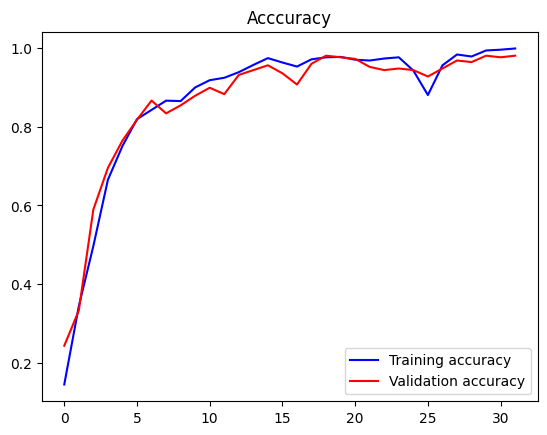

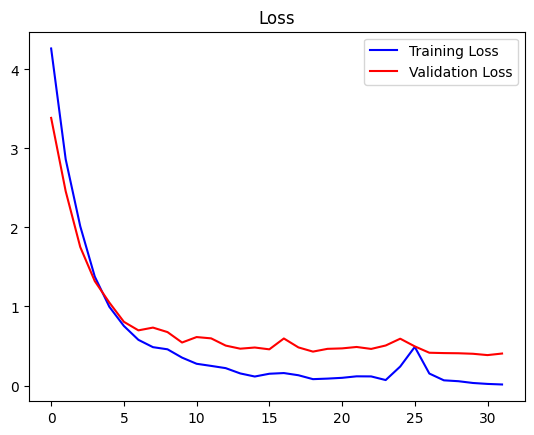

In [ ]:
#plotting accuracy and loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Acccuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [ ]:
# Simpan model ke dalam file
model.save("model.h5")

In [ ]:
from tensorflow.keras.models import load_model

#load a model from a file
loaded_model = load_model("model.h5")

#evaluation of loaded models
test_loss, test_accuracy = loaded_model.evaluate(test_features, test_labels)

8/8 [==============================] - 0s 15ms/step - loss: 0.0970 - accuracy: 0.9959


In [ ]:
model.save('/content/drive/MyDrive/Capstone/Model/model.h5')

# tflite converter and the optimizations
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

# Converts model to .tflite format
tfmodel = converter.convert()
open('/content/drive/MyDrive/Capstone/Model/model.tflite', 'wb').write(tfmodel)
pickle.dump(model, open('/content/drive/MyDrive/Capstone/Model/model.pkl', 'wb'))

# Predict

In [ ]:
#entering the user's food choices
karbohidrat = int(input("Masukkan pilihan Karbohidrat: "))
protein = int(input("Masukkan pilihan Protein: "))
sayur = int(input("Masukkan pilihan Sayur: "))
pengolahan = int(input("Masukkan pilihan Pengolahan: "))

#setting up input for prediction
input_data = np.array([[karbohidrat, protein, sayur, pengolahan]])

#making predictions using the model
predicted = np.argmax(model.predict(input_data))

#looking for class-appropriate food
makanan_sesuai_kelas = data[data['Kelas'] == predicted]['Makanan'].tolist()

#displaying a list of suitable foods
if makanan_sesuai_kelas:
    print("Makanan yang sesuai dengan pilihan Anda:")
    for makanan in makanan_sesuai_kelas:
        print(makanan)
else:
    print("Mohon maaf, makanan tidak tersedia.")

Masukkan pilihan Karbohidrat: 1
Masukkan pilihan Protein: 0
Masukkan pilihan Sayur: 2
Masukkan pilihan Pengolahan: 1


NameError: ignored